In [1]:
from google.colab import files
upload = files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d thedevastator/weather-prediction
!unzip -qq /content/weather-prediction.zip

Saving kaggle.json to kaggle.json
  0% 0.00/936k [00:00<?, ?B/s]
100% 936k/936k [00:00<00:00, 43.3MB/s]


In [23]:
import pandas as pd

df = pd.read_csv('/content/weather_prediction_dataset.csv')
df.head(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
5,20000106,1,3,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,...,-0.6,4.0,3.4,0.92,1.0209,0.55,0.20,7.1,3.5,10.7
6,20000107,1,8,0.84,1.0267,0.20,0.00,0.0,4.7,1.8,...,1.7,4.1,2.8,0.96,1.0258,0.27,0.00,6.0,3.3,8.8
7,20000108,1,4,0.79,1.0248,0.54,0.00,4.3,5.6,4.1,...,3.5,6.4,3.6,0.97,1.0210,0.18,0.14,8.2,5.3,11.0
8,20000109,1,8,0.88,1.0243,0.11,0.65,0.0,4.6,3.8,...,3.3,5.1,3.0,0.91,1.0280,0.43,0.02,5.6,3.7,7.6
9,20000110,1,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,...,0.0,5.5,1.9,0.94,1.0369,0.58,0.04,1.8,-1.5,5.0


> 18개의 도시. 도시 별 9개의 날씨 관련 column. 도시 별로 예측값을 구하기  
> 2000~2008년까지 9년치 train, 2009년 1년치 test  
> 1년당 365일  
> 도시별 shape = (365*9, 9)  
> 도시별 loss는 plot하고 전체 도시의 예측값 실제값에 대한 MAE를 하나로 내기

In [ ]:
df.iloc[:, -8:].isnull().sum()

TOURS_wind_speed          0
TOURS_humidity            0
TOURS_pressure            0
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
dtype: int64

In [ ]:
print(df.iloc[:, -8:].max())
print('=' * 30)
print(df.iloc[:, -8:].min())

TOURS_wind_speed          10.8000
TOURS_humidity             1.0000
TOURS_pressure             1.0414
TOURS_global_radiation     3.5600
TOURS_precipitation        6.2000
TOURS_temp_mean           31.2000
TOURS_temp_min            22.6000
TOURS_temp_max            39.8000
dtype: float64
TOURS_wind_speed           0.7000
TOURS_humidity             0.3300
TOURS_pressure             0.0003
TOURS_global_radiation     0.0500
TOURS_precipitation        0.0000
TOURS_temp_mean           -6.2000
TOURS_temp_min           -13.0000
TOURS_temp_max            -3.1000
dtype: float64


**2000, 2004, 2008년 윤년, 2010년 row 1개**  
총 365 * 9 + 3 + 1 = 3654

**Index**
> 2007.12.31: 2922  
2008.12.31: 3288  
2009.12.31: 3653  

In [41]:
df.iloc[:,-15:-8]

,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max
0,8,1.0163,0.17,0.0,-2.3,-9.3,0.7
1,8,1.0108,0.20,0.0,1.3,0.5,2.0
2,7,1.0071,0.08,1.8,0.8,-1.0,2.8
3,2,0.9947,0.00,5.0,3.5,2.5,4.6
4,5,1.0072,0.00,2.2,-0.6,-1.8,2.9
...,...,...,...,...,...,...,...
3649,8,0.9926,0.20,0.0,1.1,-2.7,2.4
3650,4,1.0038,0.00,0.0,-8.0,-9.5,0.8
3651,8,1.0047,0.00,0.0,-9.5,-12.5,-7.4
3652,8,1.0015,0.18,0.1,-7.6,-9.3,-6.5


In [38]:
def build_data(dataframe, target_name, start, end):
  import keras
  import numpy as np
  import pandas as pd

  '''input'''
  global d, d_arr
  d = dataframe.iloc[:,start:end]
  d_arr = d.to_numpy()
  
  # input standardization
  mean = d_arr.mean(axis=0)
  d_arr -= mean
  std = d_arr.std(axis=0)
  d_arr /= std

  '''target'''
  target = d[[target_name]]
  target_arr = target.to_numpy()

  num_train_samples = int(0.5 * len(d_arr))
  num_val_samples = int(0.25 * len(d_arr))

  '''dataset argument 조정'''
  sampling_rate = 6
  global sequence_length
  sequence_length = 30 # 각 데이터 샘플의 입력 시퀀스 길이를 1D 텐서로 지정
  delay = sampling_rate * (sequence_length + 24 - 1) # target으로 사용할 미래의 time step
  batch_size = 32
  # print(delay)

  '''dataset 구성'''
  train_dataset = keras.utils.timeseries_dataset_from_array(
      d_arr[:-delay],
      targets=target_arr[delay:],
      sampling_rate=sampling_rate,
      sequence_length=sequence_length,
      shuffle=True,
      batch_size=batch_size,
      start_index=0,
      end_index=num_train_samples)
  # print(len(d_arr[:-delay]))

  val_dataset = keras.utils.timeseries_dataset_from_array(
      d_arr[:-delay],
      targets=target_arr[delay:],
      sampling_rate=sampling_rate,
      sequence_length=sequence_length,
      shuffle=True,
      batch_size=batch_size,
      start_index=num_train_samples,
      end_index=num_train_samples + num_val_samples)

  # print(num_train_samples + num_val_samples)
  test_dataset = keras.utils.timeseries_dataset_from_array(
      d_arr[:-delay],
      targets=target_arr[delay:],
      sampling_rate=sampling_rate,
      sequence_length=sequence_length,
      shuffle=True,
      batch_size=batch_size,
      start_index=num_train_samples + num_val_samples)


  print('num_train_samples:', num_train_samples)
  print('num_val_samples:', num_val_samples)
  print('num_test_samples:', len(d_arr) - num_train_samples - num_val_samples)
  print()
  print('train_dataset:', len(train_dataset))
  print('val_dataset:', len(val_dataset))
  print('test_dataset:', len(test_dataset))
  print()
  for samples, targets in train_dataset:
    print("샘플 크기:", samples.shape)
    print("타깃 크기:", targets.shape)
    break

  return train_dataset, val_dataset, test_dataset

In [37]:
train_dataset, val_dataset, test_dataset = build_data(df, 'STOCKHOLM_temp_mean', -15, -8)

num_train_samples: 1827
num_val_samples: 913
num_test_samples: 914

train_dataset: 52
val_dataset: 23
test_dataset: 14

샘플 크기: (32, 30, 7)
타깃 크기: (32, 1)


In [ ]:
city = ['BASEL', 'BUDAPEST', 'DE_BILT', 'DRESDEN', 'DUSSELDORF',
        'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MALMO',
        'MONTELIMAR' ,'MUENCHEN', 'OSLO', 'PERPIGNAN', 'ROMA',
        'SONNBLICK', 'STOCKHOLM', 'TOURS']

In [27]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(sequence_length, d_arr.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(4, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks,
                    verbose=1)

model = keras.models.load_model("jena_dense.keras")

Epoch 1/10
52/52 [==============================] - 2s 11ms/step - loss: 44.1322 - mae: 5.0417 - val_loss: 16.4319 - val_mae: 3.1928
Epoch 2/10
52/52 [==============================] - 1s 9ms/step - loss: 14.7626 - mae: 2.9922 - val_loss: 13.0931 - val_mae: 2.8256
Epoch 3/10
52/52 [==============================] - 0s 8ms/step - loss: 12.9415 - mae: 2.8017 - val_loss: 13.8863 - val_mae: 2.9044
Epoch 4/10
52/52 [==============================] - 0s 8ms/step - loss: 11.7661 - mae: 2.6680 - val_loss: 14.4045 - val_mae: 2.9674
Epoch 5/10
52/52 [==============================] - 0s 8ms/step - loss: 11.1058 - mae: 2.5924 - val_loss: 13.5397 - val_mae: 2.8933
Epoch 6/10
52/52 [==============================] - 0s 8ms/step - loss: 10.5423 - mae: 2.5182 - val_loss: 13.6839 - val_mae: 2.9230
Epoch 7/10
52/52 [==============================] - 0s 8ms/step - loss: 10.0426 - mae: 2.4602 - val_loss: 14.2124 - val_mae: 2.9869
Epoch 8/10
52/52 [==============================] - 0s 8ms/step - loss: 9.6

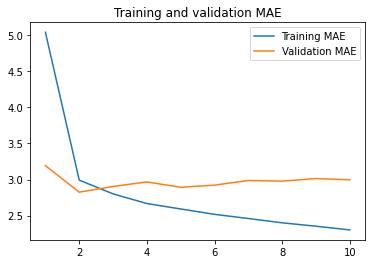

In [28]:
import matplotlib.pyplot as plt
mae = history.history["mae"]
val_mae = history.history["val_mae"]
epochs = range(1, len(mae) + 1)
plt.figure()
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [29]:
model = keras.models.load_model('/content/jena_dense.keras')
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

14/14 [==============================] - 0s 4ms/step - loss: 13.5072 - mae: 2.9268
테스트 MAE: 2.93
